In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np;
from scipy.stats import chi2_contingency;

In [3]:
df = pd.read_csv('student_depression_dataset.csv');

In [4]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.shape

(27901, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [7]:
df[df["Depression"] == 1].shape[0]

16336

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.head(5)

,id,gender,age,city,profession,academic pressure,work pressure,cgpa,study satisfaction,job satisfaction,sleep duration,dietary habits,degree,have you ever had suicidal thoughts ?,work/study hours,financial stress,family history of mental illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Prevalência Geral de Depressão na Amostra

Inicialmente, calculamos a prevalência geral de depressão em toda a amostra. Utilizando uma função para calcular a porcentagem, constatamos que aproximadamente **58.55%** dos participantes da amostra foram diagnosticados com depressão. Este número representa a proporção geral da condição em nosso conjunto de dados antes de explorarmos as associações com outras variáveis, como o gênero, profissão, horas de sono, dentre outras.

In [10]:
def cal_porcentagem(x, y):
    percent = (x / y) * 100
    return(f"{percent:.2f}")

In [11]:
cal_porcentagem(df[df["depression"] == 1].shape[0], df.shape[0])

'58.55'

### Relação entre Gênero e Depressão

Nesta seção, investigaremos a relação entre o gênero dos participantes e a ocorrência de depressão. Inicialmente, é importante notar que a amostra analisada possui uma maioria de participantes do sexo masculino (15.547 homens e 12.354 mulheres). Essa distribuição desigual deve ser levada em consideração ao interpretar os resultados desta análise.

A tabela de contingência abaixo mostra a contagem de participantes para cada combinação de gênero (Masculino e Feminino) e status de depressão (0 = Não diagnosticado com depressão, 1 = Diagnosticado com depressão), em seguida, uma tabela com as respectivas porcentagens.

Em seguida, para visualizar essa relação de forma mais clara e comparar as contagens de depressão entre os gêneros, utilizaremos um gráfico de barras agrupadas. Este gráfico exibirá, para cada gênero, duas barras lado a lado: uma representando o número de participantes sem depressão e outra representando o número de participantes com depressão.

**Consideração sobre a Amostra:** A diferença na prevalência de depressão entre os gêneros nesta amostra parece ser pequena (aproximadamente 0.18 pontos percentuais), o que pode ser influenciado pelo desbalanceamento da amostra.

In [12]:
tabela_genero_depressao = pd.crosstab(df['gender'], df['depression'], margins=True, margins_name="Total")

total_por_genero = df['gender'].value_counts()

depressao_por_genero = df[df["depression"] == 1]["gender"].value_counts()

df_percentual = pd.DataFrame({
    'Gender': depressao_por_genero.index,
    'Percentual': (depressao_por_genero / total_por_genero * 100).round(2)
})


print("\nDivisão de Gênero com e sem Depressão\n")
print(tabela_genero_depressao)
print("\n----------------------------------\n")
print("Quantos % de cada gênero tem depressão?\n")
print(df_percentual)


Divisão de Gênero com e sem Depressão

depression      0      1  Total
gender                         
Female       5133   7221  12354
Male         6432   9115  15547
Total       11565  16336  27901

----------------------------------

Quantos % de cada gênero tem depressão?

        Gender  Percentual
gender                    
Male      Male       58.63
Female  Female       58.45


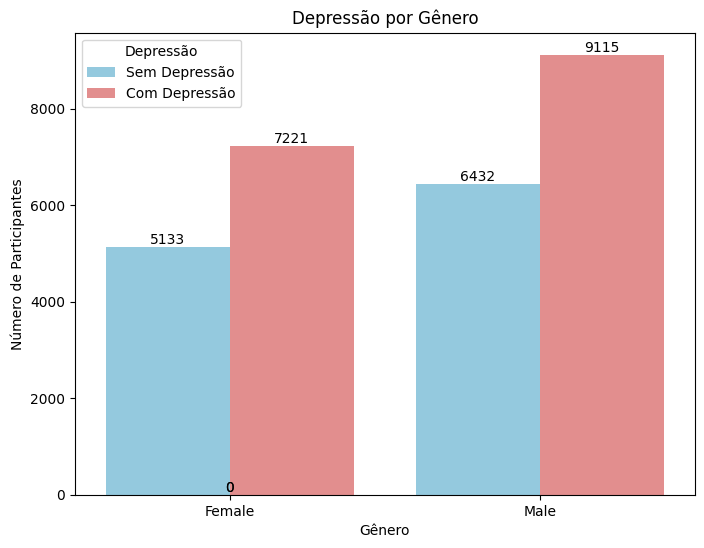

In [13]:
tabela_genero_depressao = pd.crosstab(df['gender'], df['depression'])

df_long = tabela_genero_depressao.reset_index().melt(
    id_vars='gender',
    value_vars=[0, 1],
    var_name='depression',
    value_name='Count'
)

df_long['depression'] = df_long['depression'].map({0: 'Sem Depressão', 1: 'Com Depressão'})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='Count', hue='depression', data=df_long, palette={'Sem Depressão': 'skyblue', 'Com Depressão': 'lightcoral'})

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height + 3
    ax.text(x, y, f'{int(height)}', ha='center', va='bottom')

plt.title('Depressão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Participantes')
plt.legend(title='Depressão')
plt.show()

### Prevalência de Depressão por Faixa Etária - Foco em Jovens Adultos

Nesta seção, investigamos a distribuição da depressão entre diferentes faixas etárias dos participantes. A coluna 'Age' foi categorizada em três grupos: 'Young Adult' (18-35 anos), 'Adult' (36-50 anos) e 'Elderly' (51-100 anos). A tabela de contingência abaixo exibe a contagem de participantes com e sem depressão em cada faixa etária.

Como a maioria dos participantes se encontra na faixa etária de 'Young Adult', focamos nossa análise nesse grupo. Dos 26275 Jovens Adultos, 15109 relataram ter depressão, o que corresponde a aproximadamente **57.50%** desse grupo. Para visualizar essa distribuição dentro dos Jovens Adultos, o gráfico de barras abaixo compara a porcentagem daqueles com e sem depressão.


In [14]:
df['ageGroup'] = pd.cut(
    df['age'],
    bins = [18, 35, 51, 100],
    labels =['Young Adult', 'Adult', 'Elderly' ]
)

In [15]:
pd.crosstab(df["depression"], df["ageGroup"], margins=True, margins_name="Total")

ageGroup,Young Adult,Adult,Elderly,Total
depression,,,,
0,11166,24,4,11194
1,15109,11,0,15120
Total,26275,35,4,26314


In [16]:
total_young_adults = 26275
young_adults_depressed = 15109

cal_porcentagem(young_adults_depressed, total_young_adults)

'57.50'

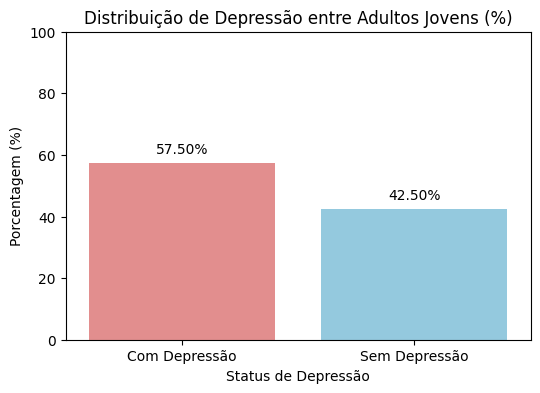

In [17]:
labels = ['Com Depressão', 'Sem Depressão']
porcentagens = [57.50, 42.50]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=porcentagens, hue=labels, palette=colors, legend=False)
plt.title('Distribuição de Depressão entre Adultos Jovens (%)')
plt.xlabel('Status de Depressão')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 100)

for i, v in enumerate(porcentagens):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

### Relação entre Depressão e Histórico Familiar de Doença Mental

Nesta seção, investigamos a possível associação entre o histórico familiar de doença mental e a ocorrência de depressão entre os participantes da pesquisa. Realizamos um agrupamento dos dados pela coluna 'Family History of Mental Illness' e calculamos a porcentagem de participantes com e sem depressão em cada grupo.

Para verificar a significância estatística dessa aparente diferença nas proporções, aplicamos o teste Qui-Quadrado de Independência, que retornou um p-valor de **0.566**. Este valor é consideravelmente maior que o limiar de 0.05, indicando que **não há uma associação estatisticamente significativa** entre ter histórico familiar de doença mental e a ocorrência de depressão na nossa amostra. As diferenças observadas nas porcentagens podem ser atribuídas à variabilidade aleatória.

A visualização dessas porcentagens em um gráfico de barras agrupadas reforça essa conclusão.

In [18]:
df.groupby(['family history of mental illness'])[['depression']].value_counts(normalize=True).round(2) * 100

family history of mental illness  depression
No                                1             56.0
                                  0             44.0
Yes                               1             61.0
                                  0             39.0
Name: proportion, dtype: float64

In [19]:
data = [[44, 56],  
        [39, 61]] 

chi2, p, dof, expected = chi2_contingency(data)
print(f'p-valor: {p}')

p-valor: 0.5659399677184773


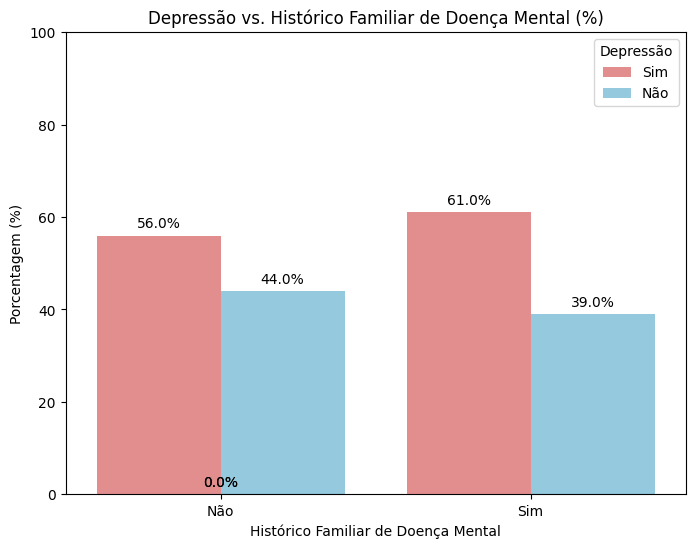

In [20]:
data = {
    'Histórico Familiar': ['Não', 'Não', 'Sim', 'Sim'],
    'Depressão': ['Sim', 'Não', 'Sim', 'Não'],
    'Porcentagem': [56.0, 44.0, 61.0, 39.0]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Histórico Familiar', y='Porcentagem', hue='Depressão', data=df_plot, palette={'Sim': 'lightcoral', 'Não': 'skyblue'})

plt.title('Depressão vs. Histórico Familiar de Doença Mental (%)')
plt.xlabel('Histórico Familiar de Doença Mental')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 100)
plt.legend(title='Depressão')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height + 1 
    ax.text(x, y, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

### Associação entre Depressão e Pensamentos Suicidas

Nesta seção, investigamos a relação entre o diagnóstico de depressão e a ocorrência de pensamentos suicidas entre os participantes da pesquisa. Inicialmente, verificamos se todos os indivíduos com depressão relataram ter tido pensamentos suicidas, e o resultado foi: **False**.

Em seguida, analisamos a frequência de pensamentos suicidas em participantes com e sem depressão através da seguinte tabela de contingência;

A partir dessa tabela, calculamos a porcentagem de pessoas com pensamentos suicidas dentro do grupo com depressão. Constatamos que, de 16336 participantes com depressão, 13957 relataram ter tido pensamentos suicidas, o que representa aproximadamente **85.44%** desse grupo. Em contraste, aproximadamente **31.98%** das pessoas sem depressão relataram ter tido pensamentos suicidas (calculado como 3699/11565 * 100).

Para visualizar essa forte associação, o gráfico de barras abaixo compara a porcentagem de participantes com pensamentos suicidas entre aqueles com e sem diagnóstico de depressão.

In [21]:
depressed = df[df['depression'] == 1]

all_depressed_had_thoughts = (depressed['have you ever had suicidal thoughts ?'] == 1).all()

print("Todas as pessoas com depressão relataram pensamentos suicidas?", all_depressed_had_thoughts)

Todas as pessoas com depressão relataram pensamentos suicidas? False


In [22]:
cross_tab = pd.crosstab(
    df['depression'],
    df['have you ever had suicidal thoughts ?'],
    margins=True,
    margins_name="Total"
)

print(cross_tab)

have you ever had suicidal thoughts ?     No    Yes  Total
depression                                                
0                                       7866   3699  11565
1                                       2379  13957  16336
Total                                  10245  17656  27901


In [23]:
cal_porcentagem(13957, 16336)

'85.44'

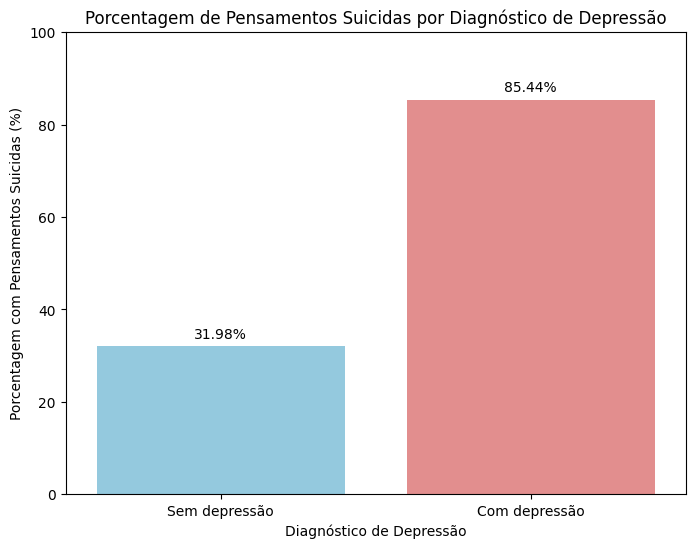

In [24]:
data = {
    'Depressão': ['Não', 'Sim'],
    'Pensamentos Suicidas (Sim)': [3699, 13957],
    'Total': [11565, 16336]
}
df_plot = pd.DataFrame(data)

df_plot['Percentage'] = (df_plot['Pensamentos Suicidas (Sim)'] / df_plot['Total']) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Depressão', y='Percentage', hue='Depressão', data=df_plot, palette=['skyblue', 'lightcoral'], legend=False)
plt.title('Porcentagem de Pensamentos Suicidas por Diagnóstico de Depressão')
plt.xlabel('Diagnóstico de Depressão')
plt.ylabel('Porcentagem com Pensamentos Suicidas (%)')
plt.ylim(0, 100)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Sem depressão', 'Com depressão'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

### Relação entre Horas de Estudo/Trabalho e Depressão

Nesta seção, investigamos a possível associação entre o número de horas dedicadas ao estudo (considerando a grande predominância de estudantes na amostra) ou trabalho e a ocorrência de depressão. A análise da distribuição das profissões revelou que a grande maioria dos participantes (27870) se identificou como estudante, sugerindo que as horas reportadas na coluna 'Work/Study Hours' referem-se principalmente ao tempo dedicado aos estudos.

Ao analisar a porcentagem de participantes com depressão para cada faixa de horas de estudo/trabalho, observamos a seguinte tendência:

O gráfico de linhas indica que, em geral, a porcentagem de participantes com depressão tende a aumentar à medida que o número de horas de estudo/trabalho se eleva, especialmente acima de 4 horas diárias. **É importante ressaltar que, devido à predominância de estudantes na amostra, essa relação reflete principalmente a associação entre a carga horária de estudo e a depressão.**

In [25]:
df["profession"].value_counts()

profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

In [26]:
df["work/study hours"].value_counts()

work/study hours
10.0    4234
12.0    3172
11.0    2892
8.0     2509
6.0     2247
9.0     2026
7.0     2001
0.0     1700
4.0     1614
2.0     1590
3.0     1470
5.0     1296
1.0     1150
Name: count, dtype: int64

In [27]:

df.groupby(['work/study hours'])[['depression']].value_counts()


work/study hours  depression
0.0               0             1096
                  1              604
1.0               0              686
                  1              464
2.0               0              894
                  1              696
3.0               0              773
                  1              697
4.0               1              815
                  0              799
5.0               1              706
                  0              590
6.0               1             1288
                  0              959
7.0               1             1176
                  0              825
8.0               1             1568
                  0              941
9.0               1             1214
                  0              812
10.0              1             2979
                  0             1255
11.0              1             1960
                  0              932
12.0              1             2169
                  0             1003
Name: cou

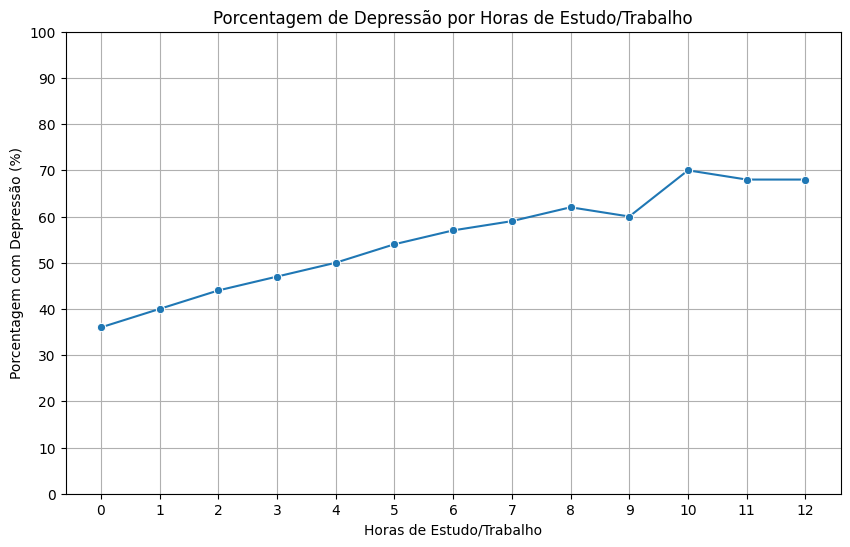

In [28]:
data = {
    'Work/Study Hours': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0],
    'Depression_Percentage': [36.0, 40.0, 44.0, 47.0, 50.0, 54.0, 57.0, 59.0, 62.0, 60.0, 70.0, 68.0, 68.0]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Work/Study Hours', y='Depression_Percentage', data=df_plot, marker='o')
plt.title('Porcentagem de Depressão por Horas de Estudo/Trabalho')
plt.xlabel('Horas de Estudo/Trabalho')
plt.ylabel('Porcentagem com Depressão (%)')
plt.xticks(df_plot['Work/Study Hours'])
plt.yticks(range(0, 101, 10))
plt.grid(True)

plt.show()

### Relação entre Duração do Sono e Depressão

Nesta seção, investigamos a associação entre a duração habitual do sono dos participantes e a ocorrência de depressão. Ao analisarmos a distribuição da depressão nas diferentes categorias de duração do sono, observamos uma prevalência notavelmente alta de indivíduos diagnosticados com depressão em todos os grupos. A tabela de contingência abaixo ilustra essa distribuição.

Apesar dessa alta incidência geral de depressão, investigamos a significância estatística das diferenças nas proporções de depressão entre os grupos de duração do sono aplicando o teste Qui-Quadrado de Independência. O resultado do teste revelou um p-valor de **0.0000**, indicando uma **associação estatisticamente significativa** entre a duração do sono e a depressão na nossa amostra.

O gráfico de barras sugere uma relação entre a duração do sono e a prevalência de depressão. Observamos que a maior porcentagem de depressão ocorre entre aqueles que dormem **menos de 5 horas** por noite (65.0%). Interessantemente, dormir **mais de 8 horas** também está associado a uma taxa de depressão maior (51.0%) em comparação com aqueles que dormem na faixa considerada ideal de 7-8 horas (60.0%). A categoria 'Others', apresenta uma taxa de depressão de 50.0%, mas por ter um número pequeno de participantes nao foi adicionado no gráfico. 

Esses resultados reforçam a importância da qualidade e da duração do sono na saúde mental, mesmo em um contexto de alta prevalência geral de depressão na amostra. **É importante notar que esta análise se concentrou na duração do sono. Futuras investigações poderiam explorar a qualidade do sono, analisando as diferentes fases como o sono REM e o sono profundo, que podem ter associações ainda mais específicas com a ocorrência de depressão.**

In [34]:
cross_tab = pd.crosstab(
    df['sleep duration'],
    df['depression'],
    margins=True,
    margins_name="Total"
)
print(cross_tab)

depression               0      1  Total
sleep duration                          
'5-6 hours'           2666   3517   6183
'7-8 hours'           2975   4371   7346
'Less than 5 hours'   2949   5361   8310
'More than 8 hours'   2966   3078   6044
Others                   9      9     18
Total                11565  16336  27901


In [30]:
df.groupby(['sleep duration'])[['depression']].value_counts(normalize=True).round(2) * 100

sleep duration       depression
'5-6 hours'          1             57.0
                     0             43.0
'7-8 hours'          1             60.0
                     0             40.0
'Less than 5 hours'  1             65.0
                     0             35.0
'More than 8 hours'  1             51.0
                     0             49.0
Others               0             50.0
                     1             50.0
Name: proportion, dtype: float64

In [31]:
data = [
    [2666, 3517],
    [2975, 4371],
    [2949, 5361],
    [2966, 3078],
    [9, 9]      
]
chi2, p, dof, expected = chi2_contingency(data)

print(f'p-valor: {p:.4f}')



p-valor: 0.0000


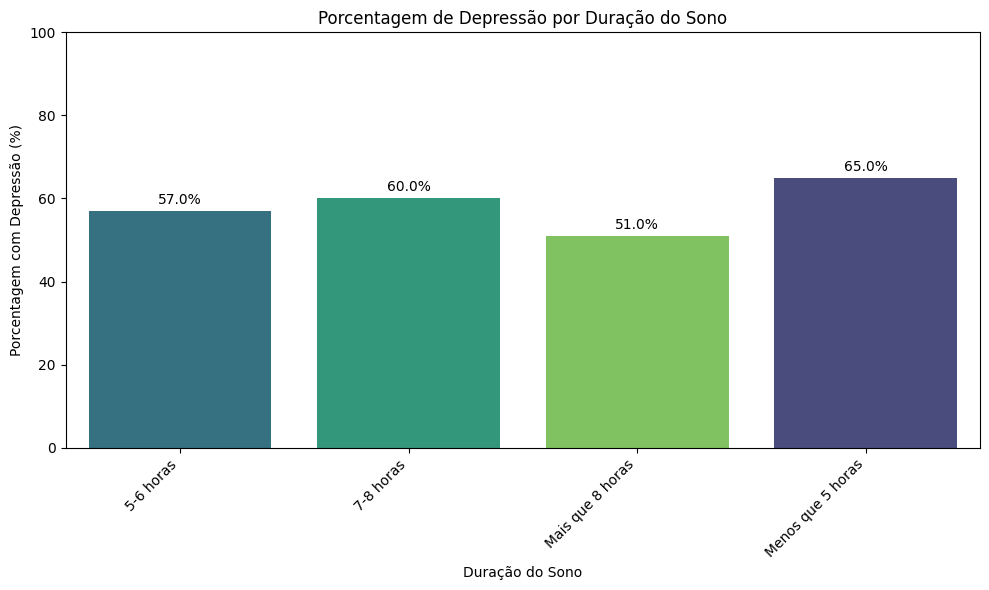

In [ ]:
data = {
    'Sleep Duration': ['5-6 horas', '7-8 horas', 'Menos que 5 horas', 'Mais que 8 horas'],
    'Depression_Percentage': [57.0, 60.0, 65.0, 51.0]
}
df_plot = pd.DataFrame(data)

order = ['Menos que 5 horas', '5-6 horas', '7-8 horas', 'Mais que 8 horas']
df_plot['sleep duration'] = pd.Categorical(df_plot['Sleep Duration'], categories=order, ordered=True)
df_plot = df_plot.sort_values('Sleep Duration')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sleep Duration', y='Depression_Percentage', hue='sleep duration', data=df_plot, palette='viridis', legend=False)
plt.title('Porcentagem de Depressão por Duração do Sono')
plt.xlabel('Duração do Sono')
plt.ylabel('Porcentagem com Depressão (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()